<h1>Week 42<h1>

In [123]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.P
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

<h2 style="background-color:grey;color:black;">Exercise 1 <h2>

In [124]:
np.random.seed(2024)

x = np.random.randn(2)  # network input. This is a single input with two features
W1 = np.random.randn(4, 2)  # first layer weights

a) Given the shape of the first layer weight matrix, what is the input shape of the neural network? What is the output shape of the first layer

The input shape is the number of columns in W1: 2
The output shape is the number of rows in W1: 4

b) Define the bias of the first layer, b1with the correct shape. (Run the next cell right after the previous to get the random generated values to line up with the test solution below)

In [125]:
b1 = np.random.randn(4)  # bias for the first layer with shape (4,)
print(b1)

[ 1.05355278  1.62404261 -1.50063502 -0.27783169]


c) Compute the intermediary z1 for the first layer

In [126]:
z1 = np.dot(W1, x) + b1
print(z1)

[ 0.60610368  4.0076268  -6.84805855  0.56469864]


d) Compute the activation a1 for the first layer using the ReLU activation function defined earlier.


In [127]:
a1 = ReLU(z1)
print(a1)

[0.60610368 4.0076268  0.         0.56469864]


In [128]:
sol1 = np.array([0.60610368, 4.0076268, 0.0, 0.56469864])

print(np.allclose(a1, sol1))


True


<h2 style="background-color:grey;color:black;">Exercise 2 <h2>

a) What is the input of the second layer? What is its shape?

The input of the second layer is the output of the first. shape 4

b) Define the weight and bias of the second layer with the right shapes.



In [129]:
W2 = np.random.randn(8, 4)  # weight matrix for the second layer with shape (3, 4)
b2 = np.random.randn(8)     # bias for the second layer with shape (3,)


c) Compute the intermediary z2 and activation a2 for the second layer.


In [130]:
z2 = np.dot(W2, a1) + b2
a2 = ReLU(z2)

In [131]:
print(
    np.allclose(np.exp(len(a2)), 2980.9579870417283)
)  # This should evaluate to True if a2 has the correct shape :)

True


<h2 style="background-color:grey;color:black;">Exercise 3 <h2>

a) Complete the function below so that it returns a list layers of weight and bias tuples (W, b) for each layer, in order, with the correct shapes that we can use later as our network parameters.

In [132]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


b) Comple the function below so that it evaluates the intermediary z and activation a for each layer, with ReLU actication, and returns the final activation a. This is the complete feed-forward pass, a full neural network!

In [133]:
def feed_forward_all_relu(layers, input):
    a = input
    for W, b in layers:
        z = np.dot(W, a) + b
        a = ReLU(z)
    return a

c) Create a network with input size 8 and layers with output sizes 10, 16, 6, 2. Evaluate it and make sure that you get the correct size vectors along the way.

In [134]:
input_size = 8
layer_output_sizes = [10,16,16,2]

x = np.random.rand(input_size)
layers = create_layers(input_size, layer_output_sizes)
predict = feed_forward_all_relu(layers, x)
print(predict)

[ 0.         26.48853829]


d) Why is a neural network with no activation functions always mathematically equivelent to a neural network with only one layer?

Each layer in a neural network applies a linear transformation to its input, which is a matrix multiplication between the weight matrix and the input vector and the addition of a bias vector. 

Activation functions introduce non-linearity between layers, allowing the network model to model more complex functions. Without activation functions, each layer simply passes a linear transformation to the next.

The composition of multiple linear functions is still a linear function. If you have multiple layers but no activation functions, the network performs successive linear transofrmations. FOr example, two layers of linear transformations can be expressed as 

$$ y = W_2(W_1 x + b_1) + b_2 = x(W_2W_1) + (W_2b_1 + b2)$$

This is equivivalent to a single linear transformation with a new weight $W_3 = W_2W_1$ and a new bias $b_3 =(W_2b_1 + b2)$

Since multiple linear tranformations can be reduced to a single linear transformation, the network is mathematically equivivalent to a single layer network with a combined weight matrix and bias.

<h2 style="background-color:grey;color:black;">Exercise 4 <h2>

a) Complete the feed_forward function which accepts a list of activation functions as an argument, and which evaluates these activation functions at each layer.

In [135]:
def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = np.dot(W, a) + b
        a = activation_func(z)
    return a

b) You are now given a list with three activation functions, two ReLU and one sigmoid. (Don’t call them yet! you can make a list with function names as elements, and then call these elements of the list later. If you add other functions than the ones defined at the start of the notebook, make sure everything is defined using autograd’s numpy wrapper, like above, since we want to use automatic differentiation on all of these functions later.)

Evaluate a network with three layers and these activation functions.


In [136]:
network_input_size = 8
layer_output_sizes = [10, 16, 16, 2]
activation_funcs = [ReLU, ReLU, sigmoid]
layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.randn(network_input_size)
feed_forward(x, layers, activation_funcs)

array([1.00000000e+00, 9.99999886e-01, 1.00000000e+00, 9.99999643e-01,
       3.07848490e-09, 9.09817297e-01, 9.99999860e-01, 3.03722990e-14,
       4.83306787e-27, 3.82896936e-07, 2.43315274e-32, 1.49682741e-14,
       1.30217445e-14, 7.94648740e-01, 1.00000000e+00, 9.99944300e-01])

c) How does the output of the network change if you use sigmoid in the hidden layers and ReLU in the output layer?

Using sigmoid activation functions in the hidden layers and ReLU in the output layer will change the behavior of the network in the following ways:

Sigmoid Activation in Hidden Layers:

The sigmoid function squashes the input values to a range between 0 and 1, as we can see above. This is good when the output for instance should be interprated as probabilities
However, sigmoid functions can suffer from vanishing gradients, especially in deep networks, which can slow down the training process.

ReLU Activation in Output Layer:
The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero.
Using ReLU in the output layer can be useful if the output needs to be non-negative and can take any value above zero.
This can be beneficial for regression tasks where the output is not bounded.

Overall, using sigmoid in the hidden layers can make the network's learning process more stable for certain tasks, while ReLU in the output layer can ensure non-negative outputs. However, the choice of activation functions should be guided by the specific requirements of the task at hand.

<h2 style="background-color:grey;color:black;">Exercise 5 <h2>

a) Complete the function create_layers_batch so that the weight matrix is the transpose of what it was when you only sent in one input at a time.

In [137]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size).T
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

b) Make a matrix of inputs with the shape (number of features, number of inputs), you choose the number of inputs and features per input. Then complete the function feed_forward_batch so that you can process this matrix of inputs with only one matrix multiplication and one broadcasted vector addition per layer. (Hint: You will only need to swap two variable around from your previous implementation, but remember to test that you get the same results for equivelent inputs!)

In [138]:
inputs = np.random.rand(1000, 4)

def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):

        z = np.dot(a, W) + b
        a = activation_func(z)

    return a

c) Create and evaluate a neural network with 4 inputs and layers with output sizes 12, 10, 3 and activations ReLU, ReLU, softmax.

In [139]:
network_input_size = 4
layer_output_sizes = [12,10,3]
activation_funcs = [ReLU, ReLU, softmax]
layers = create_layers_batch(network_input_size, layer_output_sizes)

x = np.random.randn(network_input_size)
pred = feed_forward_batch(inputs, layers, activation_funcs)

<h2 style="background-color:grey;color:black;">Exercise 6- Predicting on real data <h2>

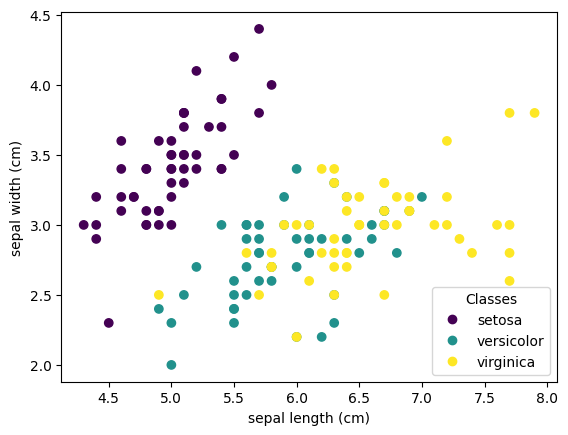

In [140]:
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [141]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)
    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [142]:
# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.P
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)




a) What should the input size for the network be with this dataset? What should the output size of the last layer be?

The input size for the network should be equal to the number of features in the dataset. For the Iris dataset, there are 4 features: `sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, and `petal width (cm)`. Therefore, the input size should be 4.

The output size of the last layer should be equal to the number of classes in the dataset. For the Iris dataset, there are 3 classes: `setosa`, `versicolor`, and `virginica`. Therefore, the output size of the last layer should be 3.

b) Create a network with two hidden layers, the first with sigmoid activation and the last with softmax, the first layer should have 8 “nodes”, the second has the number of nodes you found in exercise a). Softmax returns a “probability distribution”, in the sense that the numbers in the output are positive and add up to 1 and, their magnitude are in some sense relative to their magnitude before going through the softmax function. Remember to use the batched version of the create_layers and feed forward functions.

In [143]:
# Define the network input size and layer output sizes
network_input_size = inputs.shape[1]  # Number of features in the dataset
layer_output_sizes = [8, 3]  # First hidden layer with 8 nodes, second hidden layer with 3 nodes

activation_functions = [sigmoid, softmax]  # Activation functions for each layer

# Create the layers using the batched version of the create_layers function
layers = create_layers_batch(network_input_size, layer_output_sizes)


c) Evaluate your model on the entire iris dataset! For later purposes, we will split the data into train and test sets, and compute gradients on smaller batches of the training data. But for now, evaluate the network on the whole thing at once.

In [144]:
preds = feed_forward_batch(inputs, layers, activation_functions)
print(len(preds))

150


d) Compute the accuracy of your model using the accuracy function defined above. Recreate your model a couple times and see how the accuracy changes.

In [145]:
print(accuracy(preds, targets))

0.6133333333333333


<h2 style="background-color:grey;color:black;">Exercise 7- Training on real data <h2>

In [146]:
def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))


def cost(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

In [147]:
from autograd import grad


gradient_func = grad(
    cost, 1
)  # Taking the gradient wrt. the second input to the cost function, i.e. the layers

a) What shape should the gradient of the cost function wrt. weights and biases be?

b) Use the gradient_func function to take the gradient of the cross entropy wrt. the weights and biases of the network. Check the shapes of what’s inside. What does the grad func from autograd actually do?

In [148]:
layers_grad = gradient_func(
    inputs, layers, activation_funcs, targets
)  # Don't change this

/home/hishem/miniconda3/envs/myenv/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/hishem/miniconda3/envs/myenv/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/home/hishem/miniconda3/envs/myenv/lib/python3.12/site-packages/autograd/numpy/numpy_vjps.py:77: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/home/hishem/miniconda3/envs/myenv/lib/python3.12/site-packages/autograd/numpy/numpy_vjps.py:77: RuntimeWarning: invalid value encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


In [149]:
def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.001, epochs=100
):
    for i in range(epochs):
        layers_grad = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g

Epoch 1/5000, Accuracy: 0.31333333333333335
Epoch 2/5000, Accuracy: 0.32666666666666666
Epoch 3/5000, Accuracy: 0.35333333333333333
Epoch 4/5000, Accuracy: 0.2866666666666667
Epoch 5/5000, Accuracy: 0.49333333333333335
Epoch 6/5000, Accuracy: 0.5333333333333333
Epoch 7/5000, Accuracy: 0.56
Epoch 8/5000, Accuracy: 0.5733333333333334
Epoch 9/5000, Accuracy: 0.58
Epoch 10/5000, Accuracy: 0.5933333333333334
Epoch 11/5000, Accuracy: 0.5933333333333334
Epoch 12/5000, Accuracy: 0.6
Epoch 13/5000, Accuracy: 0.6066666666666667
Epoch 14/5000, Accuracy: 0.6133333333333333
Epoch 15/5000, Accuracy: 0.62
Epoch 16/5000, Accuracy: 0.62
Epoch 17/5000, Accuracy: 0.6266666666666667
Epoch 18/5000, Accuracy: 0.6266666666666667
Epoch 19/5000, Accuracy: 0.6333333333333333
Epoch 20/5000, Accuracy: 0.6333333333333333
Epoch 21/5000, Accuracy: 0.64
Epoch 22/5000, Accuracy: 0.64
Epoch 23/5000, Accuracy: 0.64
Epoch 24/5000, Accuracy: 0.64
Epoch 25/5000, Accuracy: 0.6466666666666666
Epoch 26/5000, Accuracy: 0.65333

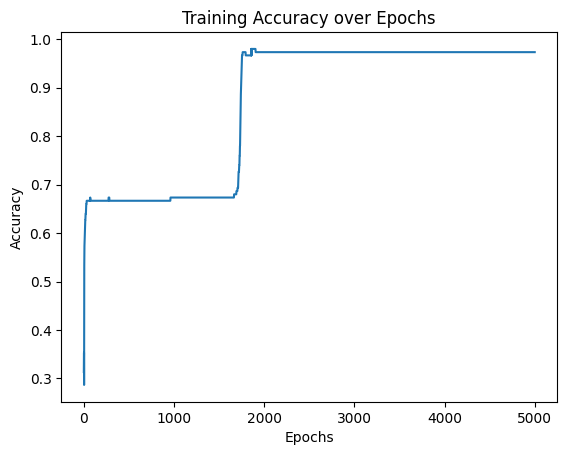

In [150]:
import matplotlib.pyplot as plt

# Define the network input size and layer output sizes
network_input_size = 4  # Number of features in the dataset
layer_output_sizes = [8, 3]  # First hidden layer with 8 nodes, second hidden layer with 3 nodes

activation_functions = [sigmoid, softmax]  # Activation functions for each layer

# Create the layers using the batched version of the create_layers function
layers = create_layers_batch(network_input_size, layer_output_sizes)

# Training parameters
learning_rate = 0.001
epochs = 5000

# Lists to store accuracy values
accuracy_values = []

# Train the network
for epoch in range(epochs):
    train_network(inputs, layers, activation_functions, targets, learning_rate, 1)
    preds = feed_forward_batch(inputs, layers, activation_functions)
    acc = accuracy(preds, targets)
    accuracy_values.append(acc)
    print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {acc}")

# Plot the accuracy over epochs
plt.plot(range(1, epochs + 1), accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()